# Appendix B: Algorithmic Efficiency

When solving a problem, there are often many different algorithms that can produce the correct answer. How do we choose between them? A critical factor is **efficiency**: how much computational resource (like time or memory) an algorithm consumes.

This appendix introduces the concept of algorithmic analysis, focusing not on exact runtimes, but on how an algorithm's resource usage **scales** as the size of the input grows. This is the key to understanding why an algorithm that is fast on small problems might become unusably slow on large ones.

## Big O Notation

**Big O notation** is the mathematical language we use to describe the complexity of an algorithm. It characterizes the *asymptotic behavior* of a function, focusing on its growth rate while ignoring constant factors and lower-order terms.

Intuitively, it describes the **upper bound** or **worst-case scenario**. If an algorithm has a time complexity of $\mathcal{O}(n^2)$, it means its runtime will grow no faster than a quadratic function of the input size $n$, especially as $n$ becomes very large.

Formally, we say $f(x) = \mathcal{O}(g(x))$ as $x \rightarrow \infty$ if there exists a positive constant $M$ and a value $x_0$ such that:

$$ |f(x)| \le M |g(x)| \quad \text{for all } x \ge x_0 $$

For example, if an algorithm takes $f(n) = (n+1)^2$ steps, we say its complexity is $\mathcal{O}(n^2)$.
This is because $(n+1)^2 = n^2 + 2n + 1$, and for $n \ge 3$, we can show that $n^2 + 2n + 1 \le 2n^2$. Here, $M=2$ and $n_0=3$ satisfy the definition.

## Common Asymptotic Complexities

Here are some of the most common complexity classes, ordered from most to least efficient for large inputs. Understanding this hierarchy is fundamental to algorithm design.

| Notation         | Name         | Example Algorithm              |
| ---------------- | ------------ | ------------------------------ |
| $\mathcal{O}(1)$      | Constant     | Accessing an array element by index |
| $\mathcal{O}(\log n)$ | Logarithmic  | Binary search in a sorted array |
| $\mathcal{O}(n)$      | Linear       | Finding the maximum value in a list |
| $\mathcal{O}(n \log n)$ | Linearithmic | Efficient sorting (e.g., Merge Sort) |
| $\mathcal{O}(n^2)$    | Quadratic    | Simple sorting (e.g., Bubble Sort) |
| $\mathcal{O}(2^n)$     | Exponential  | Traveling Salesperson (brute force) |

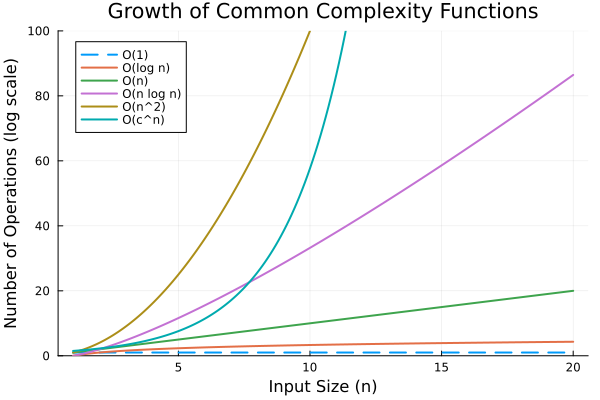

In [1]:
# Load the plotting package
using Plots

# Define a range for our input size 'n'
n = 1:0.1:20

# Plot each complexity class
plot(n, n -> 1, label="O(1)", legend=:topleft, linestyle=:dash, linewidth=2)
plot!(n, log2, label="O(log n)", linewidth=2)
plot!(n, n -> n, label="O(n)", linewidth=2)
plot!(n, n -> n * log2(n), label="O(n log n)", linewidth=2)
plot!(n, n -> n^2, label="O(n^2)", linewidth=2)
plot!(n, n -> 1.5^n, label="O(c^n)", linewidth=2)

# Set plot attributes for clarity
title!("Growth of Common Complexity Functions")
xlabel!("Input Size (n)")
ylabel!("Number of Operations (log scale)")
ylims!(0, 100) # Limit y-axis to see the polynomial functions clearly

The plot clearly illustrates why complexity matters. An exponential algorithm, $\mathcal{O}(2^n)$, might be fine for $n=10$, but it quickly becomes computationally infeasible for even moderately larger inputs.

## Time and Space Complexity

We will primarily analyze algorithms in terms of their **time** and **space** complexity.

**Time Complexity**: This measures how the runtime of an algorithm scales. Instead of measuring wall-clock time in seconds (which depends on the hardware), we typically count the number of fundamental operations (e.g., additions, comparisons, assignments). Big O notation allows us to abstract away the exact time per operation and focus on the overall growth.

**Space Complexity**: This measures how the memory usage of an algorithm scales. We are concerned with how much additional memory (beyond the input storage) is required. We usually measure this by counting the number of elements in any new arrays or data structures the algorithm creates.

## Examples of Complexity Analysis

### Dot Product and Matrix Products

Let's start with some standard linear algebra operations.

In [2]:
function dot_product(x, y)
    n = length(x)
    d = 0.0 # Use a float to avoid type instability
    for i in 1:n
        # One multiplication and one addition per iteration
        d += x[i] * y[i]
    end
    return d
end

dot_product (generic function with 1 method)

* **Time Complexity: $\mathcal{O}(n)$**
  The function iterates through the vectors once. The number of operations (1 multiplication, 1 addition) is directly proportional to $n$, the length of the vectors.
* **Space Complexity: $\mathcal{O}(1)$**
  The inputs `x` and `y` require $\mathcal{O}(n)$ space, but the function itself only allocates a few scalar variables (`n`, `d`, `i`). This is constant extra space, so the space complexity is $\mathcal{O}(1)$.

In [3]:
function square_matrix_matrix_product(A, B)
    n = size(A, 1)
    C = zeros(n, n) # Create the output matrix
    for i in 1:n      # Loop over rows of C
        for j in 1:n  # Loop over columns of C
            for k in 1:n # Inner loop for the dot product
                C[i, j] += A[i, k] * B[k, j]
            end
        end
    end
    return C
end

square_matrix_matrix_product (generic function with 1 method)

* **Time Complexity: $\mathcal{O}(n^3)$**
  The three nested loops each run $n$ times. The innermost operation is executed $n \times n \times n = n^3$ times. 
* **Space Complexity: $\mathcal{O}(n^2)$**
  The function allocates a new $n \times n$ matrix `C` to store the result. The memory required for this matrix scales quadratically with $n$.

### Finding a Maximum Value: A Case Study

Let's analyze different ways to solve the same problem and see how their complexities differ. The problem is to compute:

$$ \max_{i} \sin(x_i), \quad \text{where } x_i=10i/n \text{ for } i=0, \ldots, n. $$

#### Version 1: Store then find
A straightforward approach is to compute all the $\sin(x_i)$ values, store them in a vector, and then iterate through the vector to find the largest element.

In [4]:
function largest_sin_v1(n)
    # 1. Compute and store all sin(x_i) values
    sinx = zeros(n + 1)
    for i in 0:n
        sinx[i+1] = sin(10i / n)
    end
    
    # 2. Find the largest value in the stored vector
    largest = sinx[1]
    for i in 2:(n+1)
        if sinx[i] > largest
            largest = sinx[i]
        end
    end
    return largest
end

largest_sin_v1 (generic function with 1 method)

* **Time Complexity: $\mathcal{O}(n)$**
  The function has two separate loops, each running about $n$ times. The total number of operations is proportional to $n+n = 2n$, which is $\mathcal{O}(n)$.
* **Space Complexity: $\mathcal{O}(n)$**
  The function allocates a vector `sinx` of length $n+1$. The memory usage grows linearly with $n$.

#### Version 2: Vectorized syntax

We can write this more concisely using Julia's "vectorized" syntax. While the code is shorter, it performs the same conceptual steps: create a temporary array of all the `sin` values, then find its maximum.

In [5]:
# This is more idiomatic, but has the same complexity as v1.
largest_sin_v2(n) = maximum(sin.(10 * (0:n) ./ n))

largest_sin_v2 (generic function with 1 method)

* **Time Complexity: $\mathcal{O}(n)$** (Same as before)
* **Space Complexity: $\mathcal{O}(n)$** (Same as before, due to the temporary array created)

#### Version 3: Iterative approach

We can significantly improve the space complexity by realizing we don't need to store all the values. We can compute one value at a time and just keep track of the largest one we've seen so far.

In [6]:
function largest_sin_v3(n)
    # Initialize `largest` with the first value.
    largest = sin(0.0)
    # Loop through the rest of the values.
    for i in 1:n
        current_val = sin(10i / n)
        # If we find a new max, update `largest`.
        if current_val > largest
            largest = current_val
        end
    end
    return largest
end

largest_sin_v3 (generic function with 1 method)

* **Time Complexity: $\mathcal{O}(n)$** (Same as before)
* **Space Complexity: $\mathcal{O}(1)$** (A huge improvement!)

This version is far more scalable. For very large $n$, versions 1 and 2 would fail by running out of memory, while this version would only be limited by time.

#### Version 4: Using a Generator

Can we have the concise syntax of version 2 with the memory efficiency of version 3? Yes! Julia's **generator expressions** are perfect for this.

An array comprehension `[... for ...]` builds the entire array in memory at once. A generator `(... for ...)` creates a special object that produces the values one by one, on demand, without ever storing them all.

Functions like `maximum` are smart enough to work with these generator objects efficiently.

In [7]:
# The parentheses `()` create a memory-efficient generator.
# `maximum` iterates through the generated values without creating an intermediate array.
largest_sin_v4(n) = maximum(sin(10i / n) for i in 0:n)

largest_sin_v4 (generic function with 1 method)

* **Time Complexity: $\mathcal{O}(n)$** (Same as before)
* **Space Complexity: $\mathcal{O}(1)$** (Same as version 3)

This final version gives us the best of both worlds: elegant, readable code that is also highly memory-efficient.